# A simple covnet

In [2]:
from keras import layers
from keras import models
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np

ModuleNotFoundError: No module named 'keras'

In [3]:
#instantiate a small covnet

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

W0905 00:45:10.475917 4699948480 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0905 00:45:10.551528 4699948480 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0905 00:45:10.591406 4699948480 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0905 00:45:10.633933 4699948480 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
# add a classifier on top of the covnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [7]:
# Train covnet on MNIST images
from keras.datasets import mnist
from keras.utils import to_categorical

In [8]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

W0905 00:50:50.917841 4699948480 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0905 00:50:50.942038 4699948480 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0905 00:50:51.058107 4699948480 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0905 00:50:51.170184 4699948480 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.comp

Epoch 1/5
60000/60000 [==============================] - 36s 600us/step - loss: 0.1781 - acc: 0.9445
Epoch 2/5
60000/60000 [==============================] - 36s 605us/step - loss: 0.0470 - acc: 0.9854
Epoch 3/5
60000/60000 [==============================] - 36s 608us/step - loss: 0.0324 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 37s 613us/step - loss: 0.0249 - acc: 0.9924
Epoch 5/5
60000/60000 [==============================] - 36s 602us/step - loss: 0.0198 - acc: 0.9941


In [9]:
# evaluate model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 2s 158us/step


0.9932

# A covnet for dogs vs cats classification

In [29]:
import os
import matplotlib.pyplot as plt

In [28]:
PROJECT_DIR ="/Users/Lawrence/Documents/MACHINE_LEARNING/Exercises/dogs_cats/"
DATA_DIR = PROJECT_DIR +"DATA/"
SOURCE_DIR = PROJECT_DIR +"SRC/"

#source of raw data
raw_data = DATA_DIR +"raw_data/train/"

#directory to store smaller version of original dataset
WORKING_DIR = os.path.join(DATA_DIR,"working_dir/")

#directories for training, validation and test splits
train_dir = os.path.join(WORKING_DIR, 'train')
validation_dir = os.path.join(WORKING_DIR, 'validation')
test_dir = os.path.join(WORKING_DIR, 'test')

# directory with cat pictures(train, valid, test)
train_cats_dir = os.path.join(train_dir,'cats')
validation_cats_dir = os.path.join(validation_dir,'cats')
test_cats_dir = os.path.join(test_dir, 'cats')

#directories with dog pictures(train, valid, test)
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_dogs_dir = os.path.join(validation_dir,'dogs')
test_dogs_dir = os.path.join(test_dir, 'dogs')

#directory for models
models_dir = PROJECT_DIR +'models/'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
# configuring model for training
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0905 22:00:18.307002 4545422784 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0905 22:00:18.320947 4545422784 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0905 22:00:18.328591 4545422784 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## preprocessing data

In [30]:
# using imageDataGenerator to read images from directories

from keras.preprocessing.image import ImageDataGenerator

#rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [1]:
# Fitting the model using a batch generator

history = model.fit_generator(train_generator, 
                             steps_per_epoch=100,
                              epochs=8,
                              validation_data=validation_generator,
                             validation_steps=50)
# save model
model.save(f'{models_dir}cats_and_dogs_small_1.h5')

NameError: name 'model' is not defined

In [38]:
# plot curves of loss and accurary during training
def plot_loss_acc(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1,len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

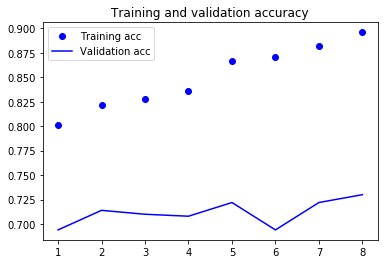

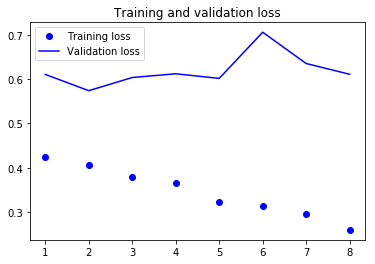

In [39]:
plot_loss_acc(history)

## Reducing overfitting with data augmentation

In [35]:
# set up a data augmentation configuration
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')


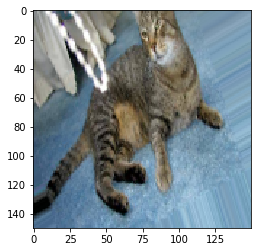

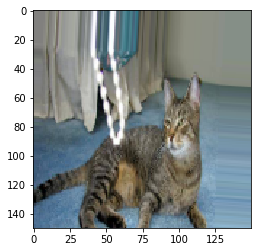

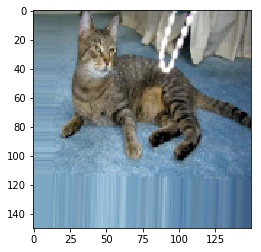

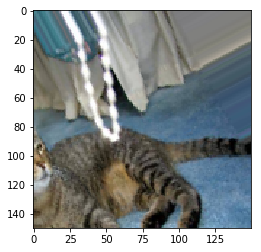

In [36]:
# view some randomly augmented training images

from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for 
          fname in os.listdir(train_cats_dir)]
img_path = fnames[3] # choose image to augment

img = image.load_img(img_path, target_size=(150, 150)) # read the image and resize it
x = image.img_to_array(img) # convert to numpy array with shape(150, 150, 3)
x = x.reshape((1,) + x.shape) # reshape it to (1, 150, 150, 3)

# generate batches of randomly transformed images. Loops indefinitely, so break inserted

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


## add a dropout to model

In [37]:
# define new convnet with dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0905 23:21:02.064341 4545422784 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 119s 1s/step - loss: 0.6942 - acc: 0.5141 - val_loss: 0.6894 - val_acc: 0.4949
Epoch 2/10
100/100 [==============================] - 106s 1s/step - loss: 0.6835 - acc: 0.5431 - val_loss: 0.6561 - val_acc: 0.5870
Epoch 3/10
100/100 [==============================] - 107s 1s/step - loss: 0.6681 - acc: 0.5772 - val_loss: 0.6394 - val_acc: 0.6206
Epoch 4/10
100/100 [==============================] - 102s 1s/step - loss: 0.6617 - acc: 0.5875 - val_loss: 0.6417 - val_acc: 0.6076
Epoch 5/10
100/100 [==============================] - 107s 1s/step - loss: 0.6485 - acc: 0.6091 - val_loss: 0.6226 - val_acc: 0.6434
Epoch 6/10
100/100 [==============================] - 111s 1s/step - loss: 0.6244 - acc: 0.6494 - val_loss: 0.6147 - val_acc: 0.6347
Epoch 7/10
100/100 [==============================] - 107s 1s/step - loss: 0.6131 - acc: 0.6553 - val_loss: 0.5816 - v

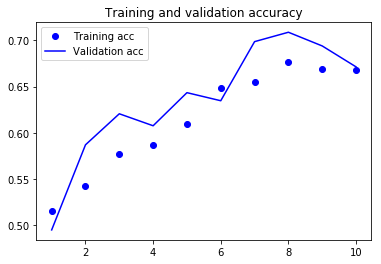

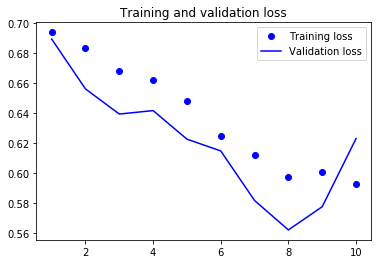

In [40]:
# retrain using data-augmentation generators

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                    batch_size=32,
                                                   class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                    batch_size=32,
                                                   class_mode='binary')

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50)

# save model
model.save(f'{models_dir}cats_and_dogs_small_2.h5')

plot_loss_acc(history)

# Using a pretrained model (VGG16 convolutional base)

In [41]:
#instantiate the VGG16 convolutional base

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))


58892288/58889256 [==============================] - 6s 0us/step


### Extracting features using the pretrained convolutional base

In [45]:
batch_size=20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150,150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

# flatten extracted features to be able to feed them to a densely connected layer
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4* 4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Train on 2000 samples, validate on 1000 samples
Epoch 1/2
2000/2000 [==============================] - 4s 2ms/step - loss: 4.2461 - acc: 0.6230 - val_loss: 1.8068 - val_acc: 0.7680
Epoch 2/2
2000/2000 [==============================] - 3s 1ms/step - loss: 2.6630 - acc: 0.7425 - val_loss: 1.4302 - val_acc: 0.8190


In [48]:
# define and train densely connected classifier
model_p1 = models.Sequential()
model_p1.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model_p1.add(layers.Dropout(0.5))
model_p1.add(layers.Dense(1, activation='sigmoid'))

model_p1.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                 loss='binary_crossentropy',
                 metrics=['acc'])

history_p1 = model_p1.fit(train_features, train_labels, epochs=30,
                          batch_size=20,
                          validation_data=(validation_features, validation_labels))


Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 4.4820 - acc: 0.6135 - val_loss: 1.8028 - val_acc: 0.7710
Epoch 2/30
2000/2000 [==============================] - 3s 2ms/step - loss: 2.7115 - acc: 0.7365 - val_loss: 1.4970 - val_acc: 0.8150
Epoch 3/30
2000/2000 [==============================] - 3s 2ms/step - loss: 2.0265 - acc: 0.7985 - val_loss: 1.3333 - val_acc: 0.8440
Epoch 4/30
2000/2000 [==============================] - 3s 2ms/step - loss: 1.7885 - acc: 0.8290 - val_loss: 1.3633 - val_acc: 0.8510
Epoch 5/30
2000/2000 [==============================] - 3s 2ms/step - loss: 1.4491 - acc: 0.8525 - val_loss: 1.1684 - val_acc: 0.8680
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 1.2326 - acc: 0.8695 - val_loss: 1.1504 - val_acc: 0.8690
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 1.1354 - acc: 0.8725 - val_loss: 1.1263 - val_acc: 0.8790
Epoch 8/30
200

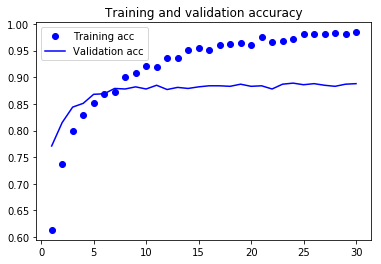

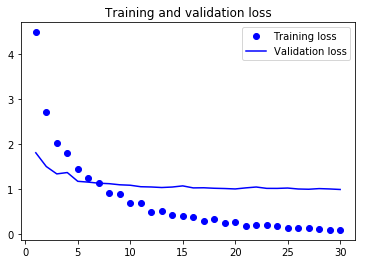

In [49]:
plot_loss_acc(history_p1)

## Feature Extraction with data augmentation

In [53]:
model_p2 = models.Sequential()
model_p2.add(conv_base)
model_p2.add(layers.Flatten())
model_p2.add(layers.Dense(256,activation='relu'))
model_p2.add(layers.Dense(1, activation='sigmoid'))

# freeze  layers of convolutional base to prevent the weights from being updated
conv_base.trainable=False

# compile model after freezeing conv base layers
model_p2.compile(loss='binary_crossentropy',
                 optimizer=optimizers.RMSprop(lr=2e-5),
                 metrics=['acc'])

# train only on GPU
"""
history_p2 = model_p2.fit_generator(train_generator,
                                    steps_per_epoch=100,
                                    epochs=30,
                                    validation_data=validation_generator,
                                    validation_steps=50)
""";

In [ ]:
plot_loss_acc(history_p2)

# Fine tuning

In [54]:
# freezing all layers up to a specific one
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [55]:
# Freezing all layers up to a specific one
conv_base.trainable  = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
# Fine tuning the model

model_p2.compile(loss='binary_crossentropy',
                 optimizer=optimizers.RMSprop(lr=1e-5),
                 metrics=['acc'])

# train only on GPU
"""
history_p2 = model_p2.fit_generator(train_generator,
                                    steps_per_epoch=100,
                                    epochs=100,
                                    validation_data=validation_generator,
                                    validation_steps=50)
""";
plot_loss_acc(history_p2)

In [ ]:
#smoothing the plots

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()